In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xarray as xr

In [3]:
# Test single datasets

# mm filepaths
# f1 = '/Users/megmason/research/sierra/data/depths_13-16_50m_downscale_clipped/20130403_clipped_50m_downscale.nc'
# f2 = '/Users/megmason/research/sierra/data/depths_13-16_50m_downscale_clipped/20130429_clipped_50m_downscale.nc'

# ars filepaths
f1 = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/batch/nc/clipped/20130601_clipped_50m_downscale.nc'


In [ ]:
d1=xr.open_dataset(f1)
# d2=xr.open_dataset(f2)


In [ ]:
print('~~ data_vars ~~')
print(d1.data_vars, '\n')
print('~~ Band1 ~~')
print(d1.Band1, '\n')
print('~~ dims ~~')
print(d1.dims, '\n')
print('~~ coords ~~')
print(d1.coords, '\n')

In [4]:
# multiple file open

# mm filepath
# path = '/Users/megmason/research/sierra/data/depths_13-16_50m_downscale_clipped/*.nc'

# ars filepath
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/batch/nc/clipped/*.nc'

flist = glob.glob(path)
# print(flist)


ds=xr.open_mfdataset(flist, concat_dim='time')


/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  coords=coords)


In [ ]:
ds.dims
# ds.var
# ds.coords


In [5]:
time_var = pd.date_range(start='1/1/2018', freq='D', periods = 40 )
ds['DATE'] = (['time'],  time_var)
ds = ds.assign_coords(time=ds.DATE)
ds.sel(time='2018-02-01')

<xarray.Dataset>
Dimensions:              (x: 1054, y: 1007)
Coordinates:
  * x                    (x) float64 2.54e+05 2.541e+05 ... 3.066e+05 3.067e+05
  * y                    (y) float64 4.179e+06 4.179e+06 ... 4.23e+06 4.23e+06
    time                 datetime64[ns] 2018-02-01
Data variables:
    Band1                (y, x) float64 dask.array<shape=(1007, 1054), chunksize=(1007, 1054)>
    transverse_mercator  |S1 b''
    DATE                 datetime64[ns] 2018-02-01
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.3, released 2017/11/20
    history:      Thu Jul 18 17:52:25 2019: GDAL Create( /home/meganmason/Doc...

In [6]:
ds.max()

<xarray.Dataset>
Dimensions:              ()
Data variables:
    Band1                float64 dask.array<shape=(), chunksize=()>
    transverse_mercator  object b''
    DATE                 datetime64[ns] 2018-02-09

In [7]:
ds.Band1.max(dim='time')

<xarray.DataArray 'Band1' (y: 1007, x: 1054)>
dask.array<shape=(1007, 1054), dtype=float64, chunksize=(1007, 1054)>
Coordinates:
  * x        (x) float64 2.54e+05 2.541e+05 2.541e+05 ... 3.066e+05 3.067e+05
  * y        (y) float64 4.179e+06 4.179e+06 4.179e+06 ... 4.23e+06 4.23e+06

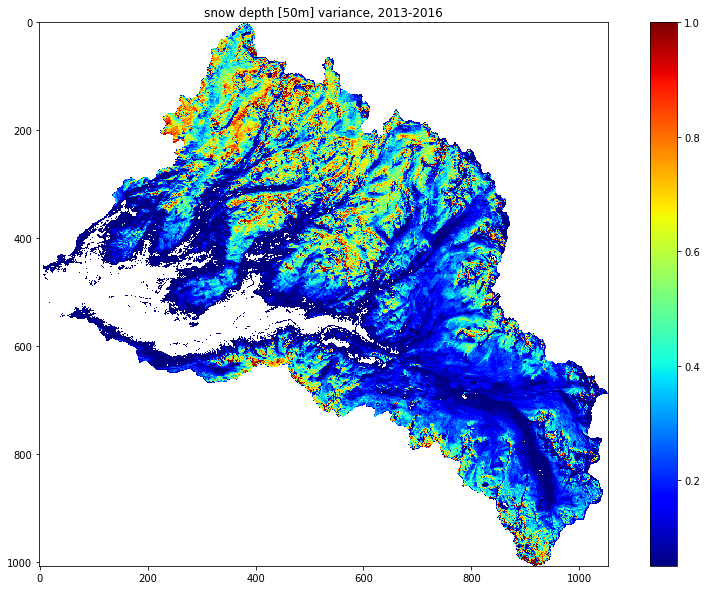

In [3]:
# variance in snow depth
varsn = ds.Band1.var(dim='time') #compute variance on every pixel in the time dimention 
varsn = np.where(varsn>.001, varsn, np.nan) # filters everything greater than 1mm (i.e gives alpha bg)
fig = plt.figure(figsize=(15, 10))
plt.imshow(varsn[::-1,:], cmap='jet', vmin=.05, vmax=1.0) #[::-1,:] - reverses it
plt.title('snow depth [50m] variance, 2013-2016')
plt.colorbar()
plt.savefig('figs/var_13-16', dpi=600)

In [ ]:
#zscore attempt....
zsc = lambda ds:(ds.Band1 - ds.Band1.mean()/ds.Band1.std())
print(type(zsc))
# print(zsc.shape)
# plt.plot(zsc)
df=zsc.to_dataframe()

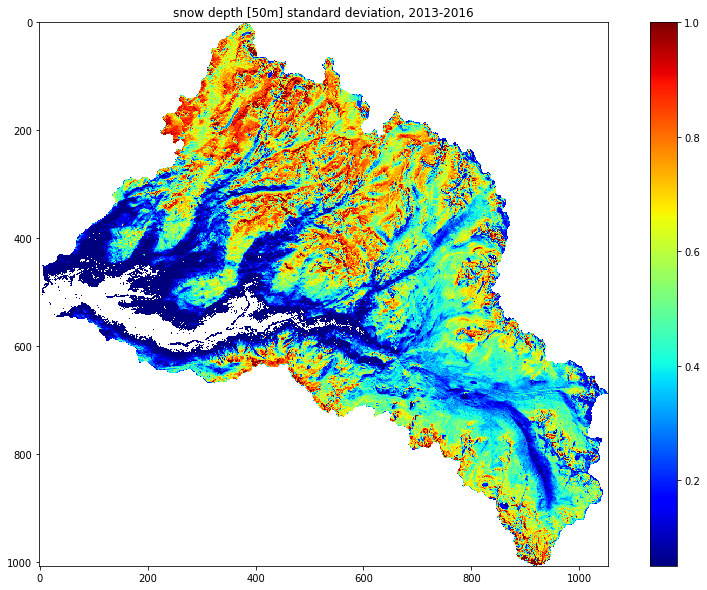

In [4]:
# std in snow depth
stdsn = ds.Band1.std(dim='time')
stdsn = np.where(stdsn>.001, stdsn, np.nan)
fig= plt.figure(figsize=(15, 10))
plt.imshow(stdsn[::-1,:], cmap='jet', vmin=.05, vmax=1.0)
plt.title('snow depth [50m] standard deviation, 2013-2016')
plt.colorbar()

In [ ]:
# mean in snow depth
meansn = ds.Band1.mean(dim='time')
meansn = np.where(meansn>.001, meansn, np.nan)
plt.title('snow depth [50m] mean, 2013-2016')
plt.imshow(meansn[::-1,:], cmap='jet',vmin=.05, vmax=1.0)
plt.colorbar()

In [ ]:
# zscore in snow depth

print(ds.Band1.shape)
ds.Band1
# zsrsn = (ds.Band1 - ds.Band1.mean(dim='time')/ds.Band1.std(dim='time'))
# print(zsrsn)
# zsrsn = np.where(zsrsn>.001, zsrsn, np.nan)
# plt.title('snow depth [50m] mean, 2013-2016')
# plt.imshow(zsrsn[::-1,:], cmap='jet')
# plt.colorbar()

In [5]:
#mm filepath
# hgt = xr.open_dataset("/Users/megmason/research/sierra/data/basedata/dem_clipped_downscale.nc")

# ars filepath
hgt = xr.open_dataset("/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_50m/batch/nc/base_data/dem_clipped_downscale.nc")

In [6]:
flat_hgt = hgt['Band1'].values.flatten() #flat_hgt.shape
flat_hgt = np.where(flat_hgt>0, flat_hgt, np.nan)
print(flat_hgt.shape)
flat_varsn = varsn.flatten()
print(flat_varsn.shape)
flat_stdsn = stdsn.flatten()
flat_meansn = meansn.flatten()

print(np.nanmin(flat_hgt))



(1061378,)
(1061378,)


NameError: name 'meansn' is not defined

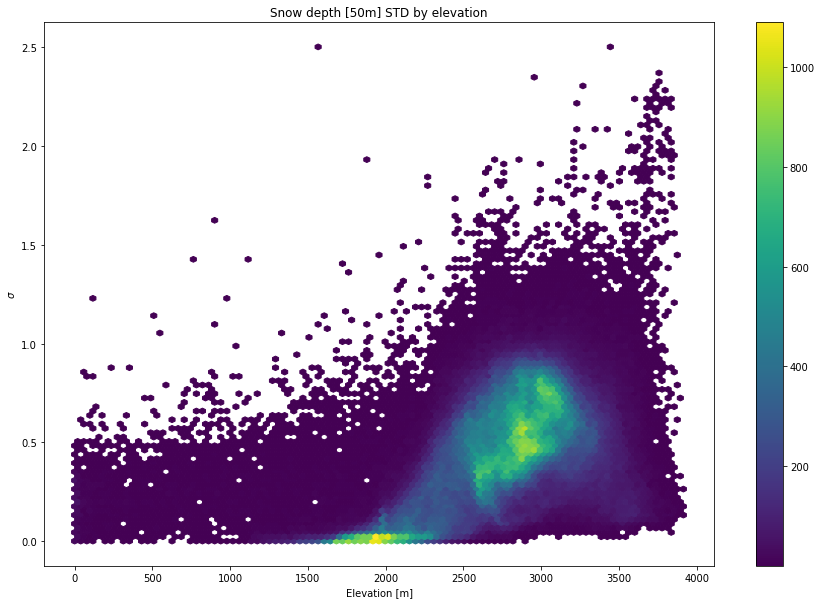

<Figure size 432x288 with 0 Axes>

In [7]:
# elevation scatter
#plt.scatter(flat_hgt, flat_rsn)

# elevation density
fig = plt.figure(figsize=(15, 10))
plt.hexbin(flat_hgt, flat_stdsn, mincnt=1)
plt.xlabel('Elevation [m]')
plt.ylabel('$\sigma$')
plt.title('Snow depth [50m] STD by elevation')
plt.colorbar()
plt.show()
plt.savefig('figs/elevation_density_13-16', dpi=600)